In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
 

df = pd.read_csv('C:/Users/Malki.T/Documents/workspace/00.run/Pakistan.csv', sep = ',', index_col='item_id')
df.head(1)

,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
item_id,,,,,,,,,,,,,,,,,,,,,
211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1048575 entries, 211131.0 to nan
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   status                 584509 non-null  object 
 1   created_at             584524 non-null  object 
 2   sku                    584504 non-null  object 
 3   price                  584524 non-null  float64
 4   qty_ordered            584524 non-null  float64
 5   grand_total            584524 non-null  float64
 6   increment_id           584524 non-null  object 
 7   category_name_1        584360 non-null  object 
 8   sales_commission_code  447349 non-null  object 
 9   discount_amount        584524 non-null  float64
 10  payment_method         584524 non-null  object 
 11  Working Date           584524 non-null  object 
 12  BI Status              584524 non-null  object 
 13   MV                    584524 non-null  object 
 14  Year                   584524

# Data Cleaning

In [5]:
df.dropna(how='all', inplace= True)

In [6]:
df.drop(columns=['increment_id', 'sales_commission_code','discount_amount','BI Status',' MV ','Year', 'Month', 'FY',
                 'Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25' ],axis=1,inplace=True)

df.rename(columns={'sku': 'articles','grand_total':'amount','category_name_1': 'category_name','Working Date': 'Working_Date',
                   'Customer Since': 'Customer_Since','Customer ID': 'Customer_ID','M-Y': 'date'}, inplace=True)
df['qty_ordered']=df['qty_ordered'].astype(int)

index_with_nan = df.index[df.isnull().any(axis=1)]
df.drop(index_with_nan,0, inplace=True)
df.isnull().sum()



status            0
created_at        0
articles          0
price             0
qty_ordered       0
amount            0
category_name     0
payment_method    0
Working_Date      0
Customer_Since    0
date              0
Customer_ID       0
dtype: int64

In [7]:
product_group=df.groupby('category_name')


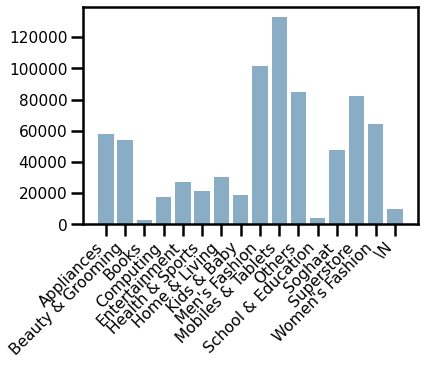

In [202]:
quantity_ordered=product_group.sum()['qty_ordered']
products=[product for product , X in product_group]
plt.bar(products,quantity_ordered)

ax3.set_xlabel('Category Name')
ax3.set_ylabel('Quantity Ordered', color='g')
plt.xticks(rotation=45, ha='right');

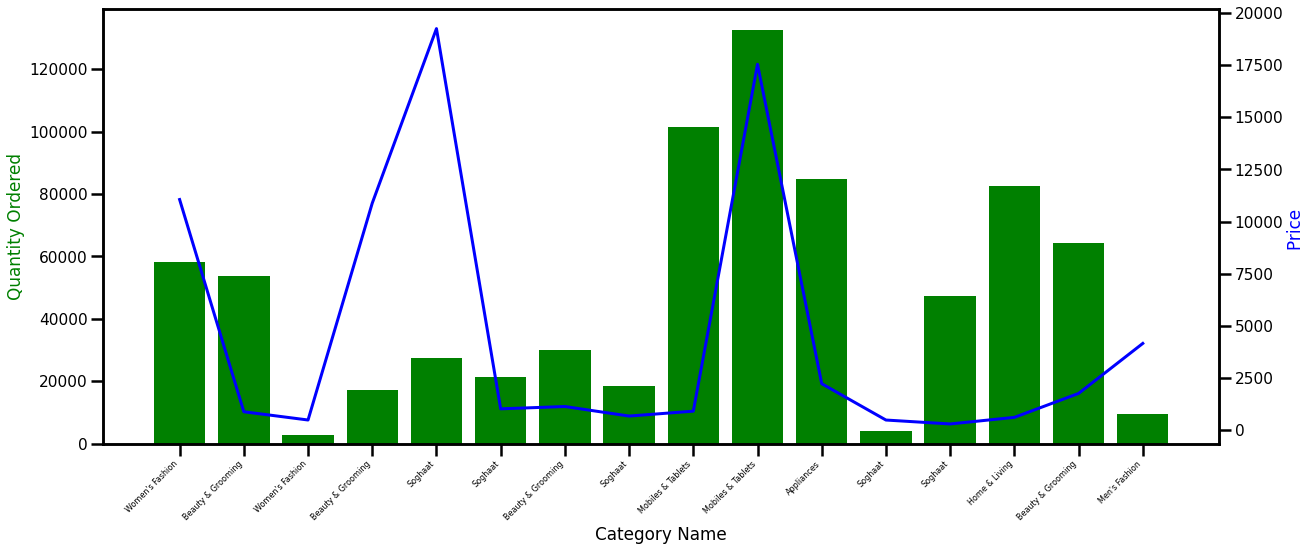

In [219]:

prices=product_group.mean()['price']

fig,ax3=plt.subplots(figsize=(20,8))

ax4=ax3.twinx()
ax3.bar(products,quantity_ordered, color='g')
ax4.plot(products,prices, 'b-')

ax3.set_xlabel('Category Name')
ax3.set_ylabel('Quantity Ordered', color='g')
ax4.set_ylabel('Price ', color='b')
ax3.set_xticklabels(df.category_name, rotation='45',ha='right', size=8);
#ax3.set_xticklabels(df.category_name, rotation='45', rotation_mode="anchor");

In [10]:
df['created_at']= pd.to_datetime(df['created_at'])
df['Working_Date']= pd.to_datetime(df['Working_Date'])
df['Customer_Since']= pd.to_datetime(df['Customer_Since'])
df['date']= pd.to_datetime(df['date'])

df['Year'] = df['created_at'].dt.year
df['Month'] = df['created_at'].dt.month
df['Day']  = df['created_at'].dt.day

product_revenue = df[['amount','category_name']].groupby('category_name').sum().sort_values(ascending=False,by='amount')
product_revenue

,amount
category_name,
Mobiles & Tablets,2.440777e+09
Appliances,6.568497e+08
Entertainment,5.389914e+08
Women's Fashion,2.825768e+08
Computing,2.025457e+08
Men's Fashion,1.941367e+08
Others,1.924014e+08
Superstore,1.121146e+08
Beauty & Grooming,9.718264e+07


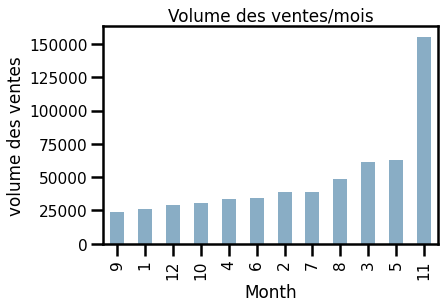

In [239]:
df['Month'].value_counts().sort_values().plot(kind='bar', xlabel='Month', ylabel='volume des ventes', title='Volume des ventes/mois');

In [189]:
years = [unique for unique in df.Year.unique()]
years

[2016, 2017, 2018]

In [190]:
def plot_trend(years:list, df):
    for year in years:
        new_df = df[df['Year'] == year]
        new_df.groupby('created_at')['amount'].sum().plot(linewidth=1.2, 
                                             ylabel='CA', 
                                             xlabel='Date', 
                                             title='Sales Trend');


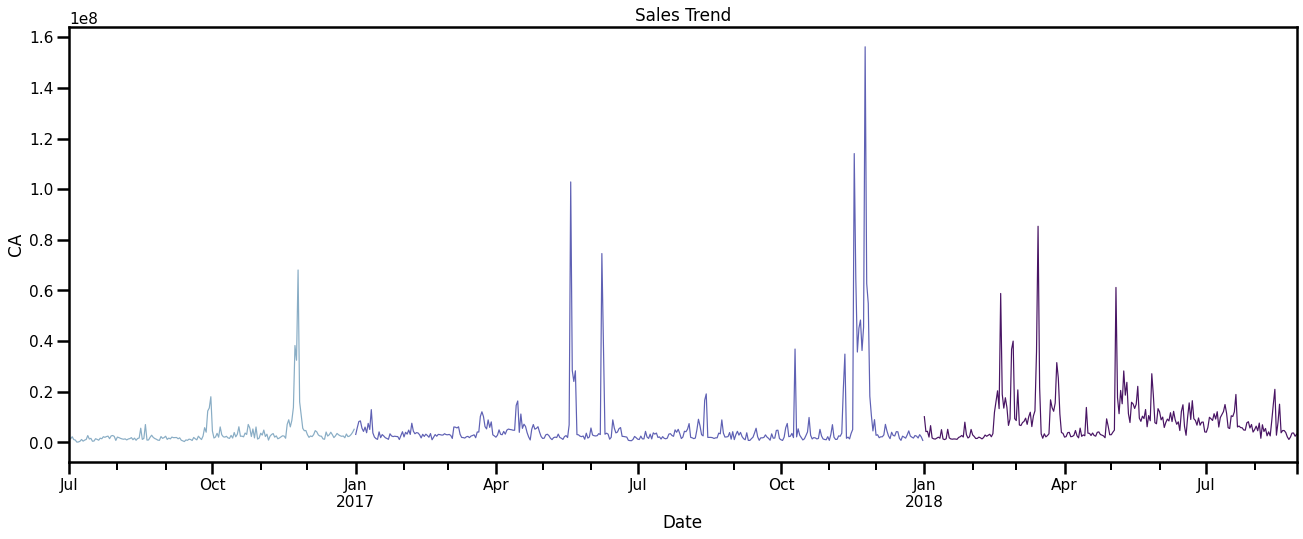

In [232]:
import matplotlib.patches as patches
plt.subplots(figsize=(22,8))
year1 = patches.Patch(label='2016')
year2 = patches.Patch( label='2017')
year3 = patches.Patch( label='2018')
plot_trend(years, df)



# RFM Segmentation

In [13]:
temp=['Customer_ID','price', 'amount', 'date', 'qty_ordered']
RFM_data=df[temp]
RFM_data.shape
RFM_data.head(20)

,Customer_ID,price,amount,date,qty_ordered
item_id,,,,,
211131.0,1.0,1950.00,1950.00,2016-07-01,1
211133.0,2.0,240.00,240.00,2016-07-01,1
211134.0,3.0,2450.00,2450.00,2016-07-01,1
211135.0,4.0,360.00,60.00,2016-07-01,1
211136.0,5.0,555.00,1110.00,2016-07-01,2
211137.0,6.0,80.00,80.00,2016-07-01,1
211138.0,7.0,360.00,60.00,2016-07-01,1
211139.0,6.0,170.00,170.00,2016-07-01,1
211140.0,8.0,96499.00,96499.00,2016-07-01,1


In [14]:
RFM_data["date"].max()

Timestamp('2018-08-01 00:00:00')

In [15]:
df['Working_Date'].max()

Timestamp('2018-08-28 00:00:00')

In [16]:
RFM_data['date'].min()

Timestamp('2016-07-01 00:00:00')

In [17]:
df['Working_Date'].min()

Timestamp('2016-07-01 00:00:00')

In [14]:
NOW = dt.datetime(2018,8,28)

# RFM Table
RFM_table=RFM_data.groupby('Customer_ID').agg({'date': lambda x: (NOW - x.max()).days, # Recency
                                                'qty_ordered': lambda x: len(x.unique()), # Frequency
                                                'amount': lambda x: x.sum()})    # Monetary 

RFM_table['date'] = RFM_table['date'].astype(int)

RFM_table.rename(columns={'date': 'recency', 
                         'qty_ordered': 'frequency',
                         'amount': 'monetary'}, inplace=True)
RFM_table.head()

,recency,frequency,monetary
Customer_ID,,,
1.0,788,1,1950.00
2.0,665,1,510.00
3.0,484,1,7430.00
4.0,27,5,2567596.45
5.0,788,1,1110.00


In [15]:
RFM_table['R_score'] = RFM_table['recency'].rank(ascending=False)
RFM_table['F_score'] = RFM_table['frequency'].rank(ascending=True)
RFM_table['M_score'] = RFM_table['monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
RFM_table['R_norm'] = (RFM_table['R_score']/RFM_table['R_score'].max())*100
RFM_table['F_norm'] = (RFM_table['F_score']/RFM_table['F_score'].max())*100
RFM_table['M_norm'] = (RFM_table['F_score']/RFM_table['M_score'].max())*100
 
RFM_table.drop(columns=['R_score', 'F_score', 'M_score'])
 
RFM_table.head()

,recency,frequency,monetary,R_score,F_score,M_score,R_norm,F_norm,M_norm
Customer_ID,,,,,,,,,
1.0,788,1,1950.00,666.0,50084.0,36807.5,0.585891,43.436481,43.436481
2.0,665,1,510.00,13685.5,50084.0,8135.5,12.039359,43.436481,43.436481
3.0,484,1,7430.00,37076.5,50084.0,66039.0,32.616804,43.436481,43.436481
4.0,27,5,2567596.45,113673.0,115060.0,115128.0,100.000000,99.788385,99.788385
5.0,788,1,1110.00,666.0,50084.0,24605.0,0.585891,43.436481,43.436481


In [16]:
RFM_table = RFM_table.reset_index(level=0)
RFM_table.head(1)

,Customer_ID,recency,frequency,monetary,R_score,F_score,M_score,R_norm,F_norm,M_norm
0,1.0,788,1,1950.0,666.0,50084.0,36807.5,0.585891,43.436481,43.436481


In [17]:
RFM_table['RFM_Score'] = 0.15*RFM_table['R_norm']+0.28 * \
    RFM_table['F_norm']+0.57*RFM_table['M_norm']
RFM_table['RFM_Score'] *= 0.05
RFM_table = RFM_table.round(2)
RFM_table[['Customer_ID', 'RFM_Score']].head(7)

,Customer_ID,RFM_Score
0,1.0,1.85
1,2.0,1.94
2,3.0,2.09
3,4.0,4.99
4,5.0,1.85
5,6.0,1.85
6,7.0,2.06


In [19]:
RFM_table["Customer_segment"] = np.where(RFM_table['RFM_Score'] > 4.5, "Top Customers",
                                      (np.where(RFM_table['RFM_Score'] > 4,"High value Customer",
                                    (np.where(RFM_table['RFM_Score'] > 3, "Medium Value Customer",
                                    np.where(RFM_table['RFM_Score'] > 1.6,'Low Value Customers', 
                                             'Lost Customers'))))))
RFM_table[['Customer_ID', 'RFM_Score', 'Customer_segment']].head(20)


,Customer_ID,RFM_Score,Customer_segment
0,1.0,1.85,Low Value Customers
1,2.0,1.94,Low Value Customers
2,3.0,2.09,Low Value Customers
3,4.0,4.99,Top Customers
4,5.0,1.85,Low Value Customers
5,6.0,1.85,Low Value Customers
6,7.0,2.06,Low Value Customers
7,8.0,1.85,Low Value Customers
8,9.0,1.85,Low Value Customers
9,10.0,1.85,Low Value Customers


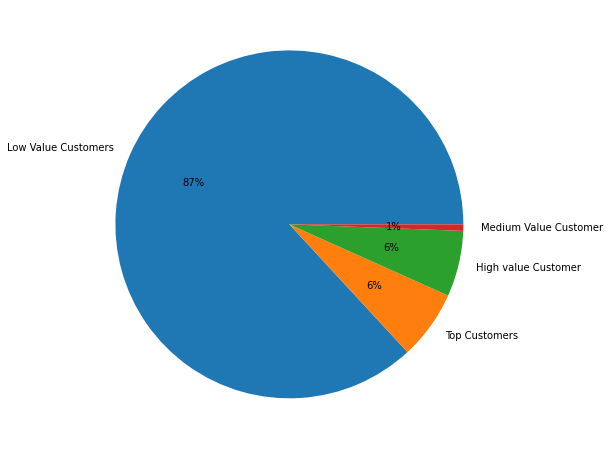

In [20]:
plt.figure(figsize=(20,8))
plt.pie(RFM_table.Customer_segment.value_counts(),
        labels=RFM_table.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Customer_segment', ylabel='count'>

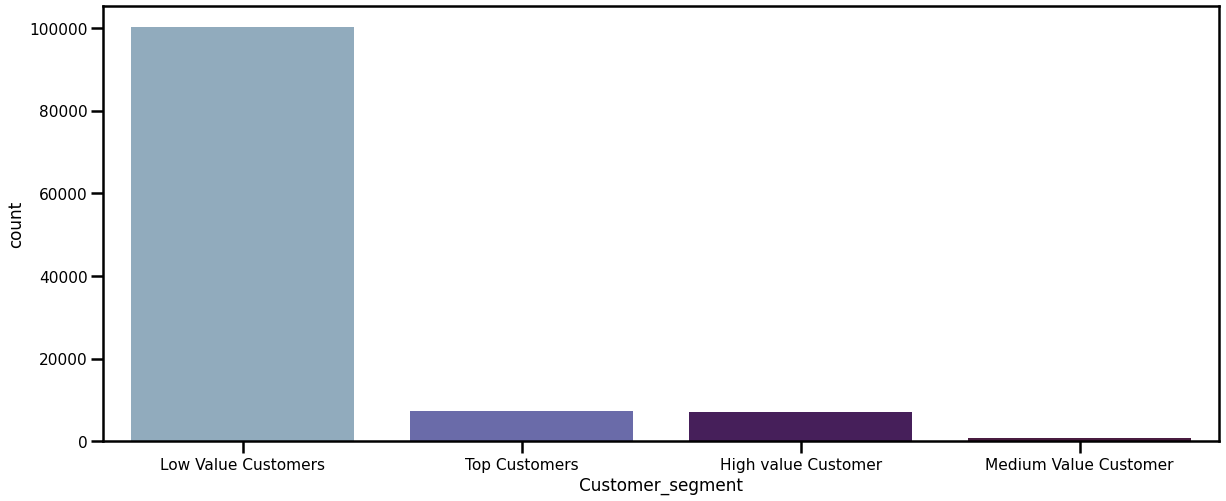

In [21]:
plt.figure(figsize=(20,8))
sns.set_context("poster", font_scale=0.7)
sns.set_palette('twilight')
sns.countplot(RFM_table['Customer_segment'])

In [22]:
RFM_table.groupby('Customer_segment').agg({
    'recency' : ['mean', 'min','max'],
    'frequency' : ['mean', 'min','max'],
    'monetary' : ['mean','min','max','count']
})

recency           frequency               monetary  \
                             mean  min  max      mean min max           mean   
Customer_segment                                                               
High value Customer    378.650206  208  788  2.138357   2  10   93202.070487   
Low Value Customers    385.863368   27  788  1.000000   1   1   23763.066616   
Medium Value Customer  705.002890  665  788  2.000000   2   2   54262.199335   
Top Customers          137.428765   27  453  2.512571   2  21  258349.411307   

                                                 
                       min          max   count  
Customer_segment                                 
High value Customer    0.0  12502191.00    7047  
Low Value Customers    0.0  35776000.00  100167  
Medium Value Customer  0.0   3375748.00     692  
Top Customers          0.0  72150379.65    7398

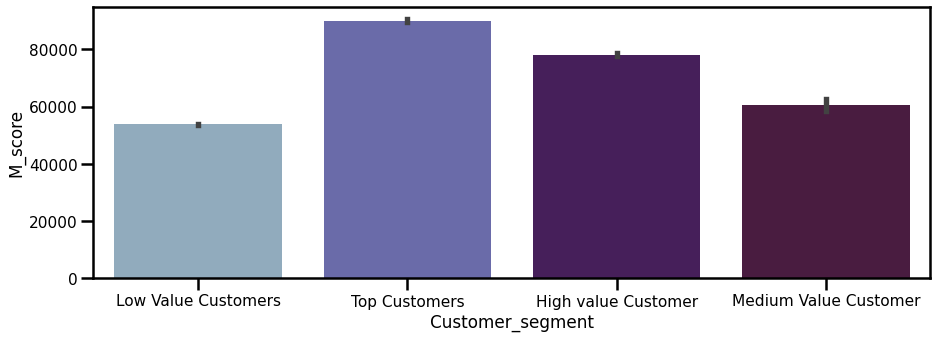

In [23]:
plt.figure(figsize=(15,5))
sns.barplot(x=RFM_table.Customer_segment, y=RFM_table.M_score);

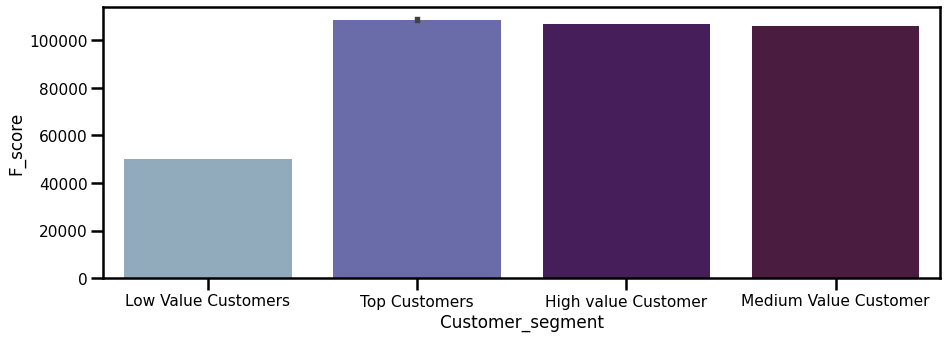

In [24]:
plt.figure(figsize=(15,5))
sns.barplot(x=RFM_table.Customer_segment, y=RFM_table.F_score);

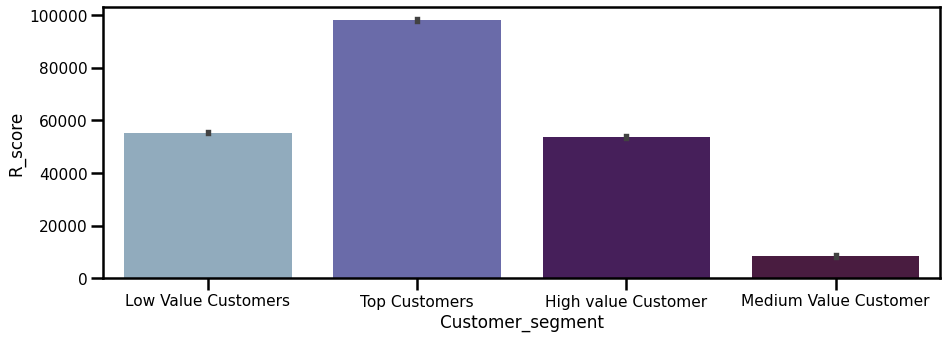

In [25]:
plt.figure(figsize=(15,5))
sns.barplot(x=RFM_table.Customer_segment, y=RFM_table.R_score);

# Etude Kmean

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [27]:
temp1=[ 'recency', 'frequency', 'monetary']
RFM_kmean=RFM_table[temp1]
RFM_kmean.head()

,recency,frequency,monetary
0,788,1,1950.00
1,665,1,510.00
2,484,1,7430.00
3,27,5,2567596.45
4,788,1,1110.00


In [28]:
scaler = StandardScaler()
x_scaled=scaler.fit(RFM_kmean)
x_scaled = scaler.fit_transform(RFM_kmean)
x_scaled


array([[ 2.00663456, -0.32447567, -0.1104145 ],
       [ 1.41418398, -0.32447567, -0.11426512],
       [ 0.54236646, -0.32447567, -0.09576075],
       ...,
       [-1.65885237, -0.32447567, -0.11416083],
       [-1.65885237, -0.32447567, -0.1124227 ],
       [-1.65885237, -0.32447567, -0.01963347]])

In [34]:
x_scaled=pd.DataFrame(x_scaled, columns = RFM_kmean.columns)
x_scaled.head(30)

,recency,frequency,monetary
0,2.006635,-0.324476,-0.110414
1,1.414184,-0.324476,-0.114265
2,0.542366,-0.324476,-0.095761
3,-1.658852,7.194283,6.750230
4,2.006635,-0.324476,-0.112661
5,2.006635,-0.324476,-0.114960
6,0.686867,-0.324476,-0.115348
7,2.006635,-0.324476,0.400456
8,2.006635,-0.324476,-0.100922
9,2.006635,-0.324476,-0.113671


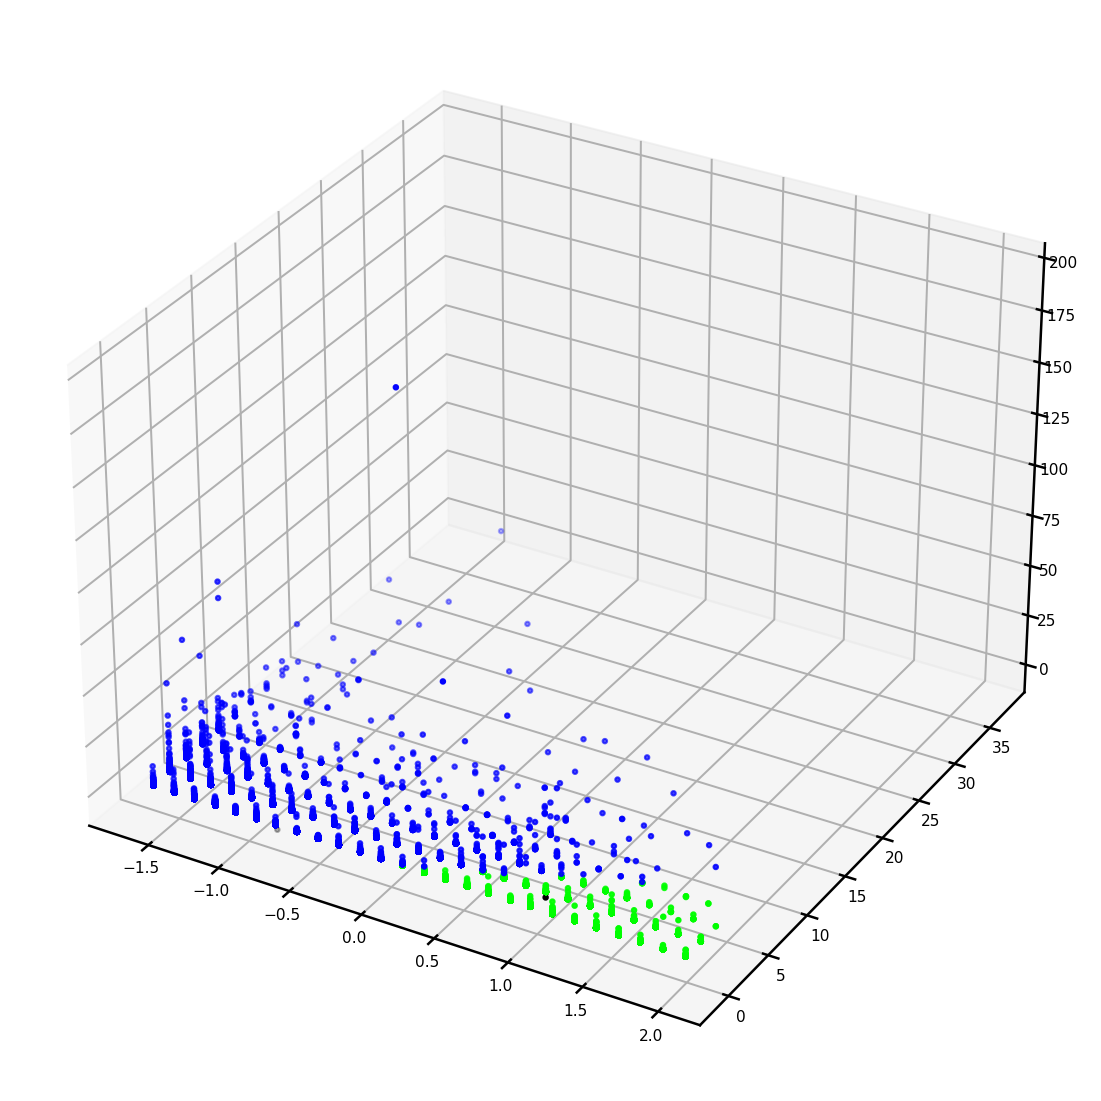

In [32]:

model=KMeans(n_clusters=(2)).fit(x_scaled)

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_scaled['recency'],x_scaled['frequency'], x_scaled['monetary'],
          cmap='brg',c=model.predict(x_scaled))
ax.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,0],c='black');

# Etude détaillée des articles achetés par client

In [48]:
best_df = pd.DataFrame()
best_df["Customer_ID"] = RFM_table[RFM_table["Customer_segment"] == "Top Customers"].index
best_df.head(5)
#best_df.to_excel("best_customers.xlsx", sheet_name='Best Customers Index')

,Customer_ID
0,3
1,14
2,15
3,19
4,20


In [49]:
good_df = pd.DataFrame()
good_df["Customer_ID"] = RFM_table[RFM_table["Customer_segment"] == "High value Customer"].index
good_df.head()
#good_df.to_excel("good_customers.xlsx", sheet_name='Good Customers Index')

,Customer_ID
0,10
1,12
2,34
3,35
4,41


In [50]:
medium_df = pd.DataFrame()
medium_df["Customer_ID"] = RFM_table[RFM_table["Customer_segment"] == "Medium Value Customer"].index
medium_df.head()
#medium_df.to_excel("medium_customers.xlsx", sheet_name='Medium Customers Index')

,Customer_ID
0,29
1,36
2,37
3,38
4,49


In [51]:
worst_df = pd.DataFrame()
worst_df["Customer_ID"] = RFM_table[RFM_table["Customer_segment"] == "Low Value Customers"].index
worst_df.head()
#worst_df.to_excel("worst_customers.xlsx", sheet_name='Worst Customers Index')

,Customer_ID
0,0
1,1
2,2
3,4
4,5


# Best Customers

In [52]:
df.head(1)

,status,created_at,articles,price,qty_ordered,amount,category_name,payment_method,Working_Date,Customer_Since,date,Customer_ID,Year,Month,Day
item_id,,,,,,,,,,,,,,,
211131.0,complete,2016-07-01,kreations_YI 06-L,1950.0,1,1950.0,Women's Fashion,cod,2016-07-01,2016-07-01,2016-07-01,1.0,2016,7,1


In [ ]:
status,category_name,articles

In [240]:
temp=[ 'Customer_ID','articles', 'category_name', 'status','date','payment_method']
df_select=df[temp]

df_select.shape

(584314, 6)

In [241]:

df_select = df_select.loc[df_select['status'] =='complete']
df_select.shape

(233684, 6)

In [242]:
merge_best=best_df.merge(df_select, how='left', on='Customer_ID')
merge_best.shape

(18775, 6)

In [243]:
index_with_nan = merge_best.index[merge_best.isnull().any(axis=1)]
merge_best.drop(index_with_nan,0, inplace=True)
merge_best.isnull().sum()

Customer_ID       0
articles          0
category_name     0
status            0
date              0
payment_method    0
dtype: int64

In [244]:
merge_best.shape

(14680, 6)

In [245]:
best_df.head(10)

,Customer_ID
0,3
1,14
2,15
3,19
4,20
5,22
6,27
7,31
8,32
9,42


In [246]:
merge_best[merge_best['articles']=='kcc_krone deal']

,Customer_ID,articles,category_name,status,date,payment_method
46,20,kcc_krone deal,Beauty & Grooming,complete,2016-07-01,cod
51,20,kcc_krone deal,Beauty & Grooming,complete,2016-07-01,cod
52,20,kcc_krone deal,Beauty & Grooming,complete,2016-07-01,cod
53,20,kcc_krone deal,Beauty & Grooming,complete,2016-07-01,cod
336,32,kcc_krone deal,Beauty & Grooming,complete,2016-08-01,cod
...,...,...,...,...,...,...
9470,38173,kcc_krone deal,Beauty & Grooming,complete,2017-03-01,cod
9481,38333,kcc_krone deal,Beauty & Grooming,complete,2017-03-01,cod
9690,41259,kcc_krone deal,Beauty & Grooming,complete,2017-04-01,cod
9706,41403,kcc_krone deal,Beauty & Grooming,complete,2017-04-01,cod


In [247]:
import itertools as it
from collections import Counter

count=Counter()

for row in merge_best['articles']:
    row_list=row.split(',')
    count.update(Counter(it.combinations(row_list,1)))
    
count.most_common(20)

[(('kcc_krone deal',), 332),
 (('MATSAM59DB75ADB2F80',), 126),
 (('RB_Harpic Loot Sale-bf',), 124),
 (('kcc_jazzy',), 111),
 (('emart_00-7',), 106),
 (('kcc_glamour deal',), 92),
 (('RB_Household Bundle',), 89),
 (('itter_AB 1211',), 86),
 (('Al Muhafiz Sohan Halwa Almond',), 80),
 (('RS_Soan Papri-500gm',), 76),
 (('BO_shovel-truck-orange',), 74),
 (('RB_Veet-bf',), 73),
 (('RB_Personal Care-bf',), 73),
 (('RS_Plain Rusk',), 69),
 (('RB_HouseholdBundle',), 68),
 (('RS_Soan Papri-250gm',), 68),
 (('unilever_Deal-6',), 61),
 (('MATSAM5A7463EE3C1A5',), 61),
 (('kcc_effect',), 56),
 (('emart_00-1',), 39)]

In [248]:
import itertools as it
from collections import Counter

count=Counter()

for row in merge_best['articles']:
    row_list=row.split(',')
    count.update(Counter(it.combinations(row_list,2)))
    
count.most_common(20)

[(('Nikon_Nikon COOLPIX L27 Compact Digital Camera - White (16.1MP', ''), 2),
 (('Just Clothing_69-Combo Pull over Hoodie h.grey', 'charcoal (Milan'), 1),
 (('Just Clothing_69-Combo Pull over Hoodie h.grey', 'C'), 1),
 (('charcoal (Milan', 'C'), 1),
 (('Just Clothing_73-Combo Pull over Hoodie Black', 'blue (limited'), 1),
 (('Just Clothing_73-Combo Pull over Hoodie Black', 'pull'), 1),
 (('blue (limited', 'pull'), 1),
 (('Just Clothing_71-Combo Zipper Hoodie blue', 'H.grey-medium'), 1),
 (('mytee_Mytee293-Red', ' White'), 1),
 (('mytee_Mytee293-Red', ' Black-S'), 1),
 ((' White', ' Black-S'), 1),
 (('aw_VN-0001-5Pack-Black', ' White'), 1),
 (('aw_VN-0001-5Pack-Black', ' Red'), 1),
 (('aw_VN-0001-5Pack-Black', ' Royal Blue & HeatherGrey-XL'), 1),
 ((' White', ' Red'), 1),
 ((' White', ' Royal Blue & HeatherGrey-XL'), 1),
 ((' Red', ' Royal Blue & HeatherGrey-XL'), 1),
 (('twh_Prntclshrt10-Grey', 'Blue'), 1),
 (('twh_Prntclshrt10-Grey', 'White-L'), 1),
 (('Blue', 'White-L'), 1)]

moyen de payement

In [304]:
print(len(merge_best[merge_best['payment_method']=='cod'])/len(merge_best)+
len(merge_best[merge_best['payment_method']=='cashatdoorstep'])/len(merge_best) )

0.6571525885558583


In [337]:
cash_best=(len(merge_best[merge_best['payment_method']=='cod'])/len(merge_best)+
len(merge_best[merge_best['payment_method']=='cashatdoorstep'])/len(merge_best) )*100

65.71525885558583

In [339]:
marketing_best=(len(merge_best[merge_best['payment_method']=='jazzvoucher'])/len(merge_best) +
len(merge_best[merge_best['payment_method']=='marketingexpense'])/len(merge_best) )*100
marketing_best

2.595367847411444

In [340]:
credit_best=(len(merge_best[merge_best['payment_method']=='customercredit'])/len(merge_best) +
len(merge_best[merge_best['payment_method']=='productcredit'])/len(merge_best) +
len(merge_best[merge_best['payment_method']=='financesettlement'])/len(merge_best) )*100

In [342]:
card_best=100-(cash_best+marketing_best+credit_best)
card_best

30.313351498637616

catégories

In [367]:
electro_best=(len(merge_best[merge_best['category_name']=='Mobiles & Tablets'])/len(merge_best)+
     len(merge_best[merge_best['category_name']=="Computing"])/len(merge_best)+
     len(merge_best[merge_best['category_name']=="Appliances"])/len(merge_best))*100

In [370]:
fashion_best=(len(merge_best[merge_best['category_name']=="Women's Fashion"])/len(merge_best)+
     len(merge_best[merge_best['category_name']=="Men's Fashion"])/len(merge_best)+
     len(merge_best[merge_best['category_name']=="Kids & Baby"])/len(merge_best))*100

In [371]:
epicery_best=(len(merge_best[merge_best['category_name']=="Soghaat"])/len(merge_best)+
     len(merge_best[merge_best['category_name']=="Superstore"])/len(merge_best)+
     len(merge_best[merge_best['category_name']=="Beauty & Grooming"])/len(merge_best))*100

In [372]:
home_best=(len(merge_best[merge_best['category_name']=="Home & Living"])/len(merge_best))*100

In [373]:
entertainement_best=(len(merge_best[merge_best['category_name']=='Entertainment'])/len(merge_best)+
     len(merge_best[merge_best['category_name']=="Health & Sports"])/len(merge_best))*100

In [374]:
others_best=100-(electro_best+fashion_best+epicery_best+home_best+entertainement_best)
others_best

3.7670299727520415

# Good Customer

In [270]:

merge_good=good_df.merge(df_select, how='left', on='Customer_ID')
merge_good.shape

(20445, 6)

In [271]:
merge_good.isnull().sum()

Customer_ID          0
articles          2357
category_name     2357
status            2357
date              2357
payment_method    2357
dtype: int64

In [272]:
index_with_nan = merge_good.index[merge_good.isnull().any(axis=1)]
merge_good.drop(index_with_nan,0, inplace=True)
merge_good.isnull().sum()

Customer_ID       0
articles          0
category_name     0
status            0
date              0
payment_method    0
dtype: int64

In [273]:
merge_good.shape

(18088, 6)

In [274]:
good_df.head(10)

,Customer_ID
0,10
1,12
2,34
3,35
4,41
5,47
6,54
7,65
8,72
9,82


In [275]:
merge_good[merge_good['articles']=='Al Muhafiz Sohan Halwa Almond']

,Customer_ID,articles,category_name,status,date,payment_method
655,35,Al Muhafiz Sohan Halwa Almond,Soghaat,complete,2016-09-01,cod
656,35,Al Muhafiz Sohan Halwa Almond,Soghaat,complete,2016-09-01,cod
665,35,Al Muhafiz Sohan Halwa Almond,Soghaat,complete,2016-09-01,cod
708,35,Al Muhafiz Sohan Halwa Almond,Soghaat,complete,2016-09-01,cod
709,35,Al Muhafiz Sohan Halwa Almond,Soghaat,complete,2016-09-01,cod
...,...,...,...,...,...,...
10187,32136,Al Muhafiz Sohan Halwa Almond,Soghaat,complete,2017-01-01,cod
13677,51171,Al Muhafiz Sohan Halwa Almond,Soghaat,complete,2017-08-01,cod
13985,53227,Al Muhafiz Sohan Halwa Almond,Soghaat,complete,2017-07-01,cod
14394,54501,Al Muhafiz Sohan Halwa Almond,Soghaat,complete,2017-07-01,cod


In [276]:
import itertools as it
from collections import Counter

count=Counter()

for row in merge_good['articles']:
    row_list=row.split(',')
    count.update(Counter(it.combinations(row_list,1)))
    
count.most_common(20)

[(('kcc_krone deal',), 266),
 (('RS_Coconut Bites',), 184),
 (('MATSAM59DB75ADB2F80',), 169),
 (('Al Muhafiz Sohan Halwa Almond',), 136),
 (('sockoye_CB-Crew Black',), 113),
 (('sockoye_CG Crew Grey',), 100),
 (('RS_Nan Khatai',), 89),
 (('RS_Soan Papri-250gm',), 89),
 (('BO_nonRC-Jeep-Silver',), 86),
 (('emart_00-7',), 78),
 (('kcc_glamour deal',), 74),
 (('RS_Habshi Halwa Tin',), 67),
 (('RS_Plain Rusk Pack of 3',), 56),
 (('Al Muhafiz Sohan Halwa Walnut',), 53),
 (('RB_Household Bundle',), 49),
 (('RB_HouseholdBundle',), 45),
 (('RS_Sohan Halwa Tin',), 44),
 (("herbion_Linkus Nova 8's Lozenges - Honey Lemon",), 43),
 (('BO_shovel-truck-orange',), 42),
 (('unilever_Deal-6',), 42)]

In [355]:
cash_good=(len(merge_good[merge_good['payment_method']=='cod'])/len(merge_good)+
len(merge_good[merge_good['payment_method']=='cashatdoorstep'])/len(merge_good))*100

In [356]:
marketing_good=(len(merge_good[merge_good['payment_method']=='jazzvoucher'])/len(merge_good) +
len(merge_good[merge_good['payment_method']=='marketingexpense'])/len(merge_good) )*100

In [357]:
credit_good=(len(merge_good[merge_good['payment_method']=='customercredit'])/len(merge_good) +
len(merge_good[merge_good['payment_method']=='productcredit'])/len(merge_good) +
len(merge_good[merge_good['payment_method']=='financesettlement'])/len(merge_good))*100

In [359]:
card_good=100-(cash_good+marketing_good+credit_good)
card_good

32.14285714285715

In [376]:
electro_good=(len(merge_good[merge_good['category_name']=='Mobiles & Tablets'])/len(merge_good)+
     len(merge_good[merge_good['category_name']=="Computing"])/len(merge_good)+
     len(merge_good[merge_good['category_name']=="Appliances"])/len(merge_good))*100

In [377]:
fashion_good=(len(merge_good[merge_good['category_name']=="Women's Fashion"])/len(merge_good)+
     len(merge_good[merge_good['category_name']=="Men's Fashion"])/len(merge_good)+
     len(merge_good[merge_good['category_name']=="Kids & Baby"])/len(merge_good))*100

In [379]:
epicery_good=(len(merge_good[merge_good['category_name']=="Soghaat"])/len(merge_good)+
     len(merge_good[merge_good['category_name']=="Superstore"])/len(merge_good)+
     len(merge_good[merge_good['category_name']=="Beauty & Grooming"])/len(merge_good))*100

In [380]:
home_good=(len(merge_good[merge_good['category_name']=="Home & Living"])/len(merge_good))*100

In [381]:
entertainement_good=(len(merge_good[merge_good['category_name']=='Entertainment'])/len(merge_good)+
     len(merge_good[merge_good['category_name']=="Health & Sports"])/len(merge_good))*100

In [382]:
others_good=100-(electro_good+fashion_good+epicery_good+home_good+entertainement_good)
others_good

3.89761167624944

# Medium Customer

In [286]:
merge_medium=medium_df.merge(df_select, how='left', on='Customer_ID')
merge_medium.shape

(4572, 6)

In [287]:
merge_medium.isnull().sum()

Customer_ID         0
articles          143
category_name     143
status            143
date              143
payment_method    143
dtype: int64

In [288]:
index_with_nan = merge_medium.index[merge_medium.isnull().any(axis=1)]
merge_medium.drop(index_with_nan,0, inplace=True)
merge_medium.isnull().sum()

Customer_ID       0
articles          0
category_name     0
status            0
date              0
payment_method    0
dtype: int64

In [289]:
merge_medium.shape

(4429, 6)

In [290]:
medium_df.head(10)

,Customer_ID
0,29
1,36
2,37
3,38
4,49
5,52
6,67
7,79
8,107
9,124


In [291]:
merge_medium[merge_medium['Customer_ID']==124]

,Customer_ID,articles,category_name,status,date,payment_method
1100,124,joko_NJLA40031-B,Beauty & Grooming,complete,2016-09-01,cod
1101,124,kcc_classy,Beauty & Grooming,complete,2016-09-01,cod
1102,124,sanasafinaz_SS-8B,Women's Fashion,complete,2017-03-01,cod
1103,124,sanasafinaz_SS-3B,Women's Fashion,complete,2017-03-01,cod


In [292]:
import itertools as it
from collections import Counter

count=Counter()

for row in merge_medium['articles']:
    row_list=row.split(',')
    count.update(Counter(it.combinations(row_list,1)))
    
count.most_common(20)

[(('kcc_krone deal',), 146),
 (('kcc_glamour deal',), 80),
 (('Al Muhafiz Sohan Halwa Almond',), 60),
 (('kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free',), 53),
 (('IDROID_BALRX7-Gold',), 43),
 (('emart_00-7',), 35),
 (('Rubian_U8 Smart Watch',), 31),
 (('RB_Household Bundle',), 30),
 (('Al Muhafiz Sohan Halwa Walnut',), 29),
 (('kcc_blaze',), 29),
 (('Infinix Hot 4 Nationwide-Gold',), 27),
 (('RS_Habshi Halwa Tin',), 25),
 (('CA_shirt-Small',), 25),
 (('IDROID_BALRX7-Jet black ',), 24),
 (('emart_00-1',), 23),
 (('Infinix Hot 4 Nationwide-Black',), 21),
 (('Telemall_MM-DR-HB-L',), 21),
 (('kcc_jazzy',), 16),
 (('cr_SESAME BALL',), 16),
 (('unilever_Deal-6',), 16)]

In [350]:
cash_medium=(len(merge_medium[merge_medium['payment_method']=='cod'])/len(merge_medium)+
len(merge_medium[merge_medium['payment_method']=='cashatdoorstep'])/len(merge_medium))*100

In [351]:
marketing_medium=(len(merge_medium[merge_medium['payment_method']=='jazzvoucher'])/len(merge_medium) +
len(merge_medium[merge_medium['payment_method']=='marketingexpense'])/len(merge_medium) )*100

In [352]:
credit_medium=(len(merge_medium[merge_medium['payment_method']=='customercredit'])/len(merge_medium)+
len(merge_medium[merge_medium['payment_method']=='productcredit'])/len(merge_medium)+
len(merge_medium[merge_medium['payment_method']=='financesettlement'])/len(merge_medium))*100

In [354]:
card_medium=100-(cash_medium+marketing_medium+credit_medium)
card_medium

16.233912847143813

catégories

In [383]:
electro_medium=(len(merge_medium[merge_medium['category_name']=='Mobiles & Tablets'])/len(merge_medium)+
     len(merge_medium[merge_medium['category_name']=="Computing"])/len(merge_medium)+
     len(merge_medium[merge_medium['category_name']=="Appliances"])/len(merge_medium))*100

In [384]:
fashion_medium=(len(merge_medium[merge_medium['category_name']=="Women's Fashion"])/len(merge_medium)+
     len(merge_medium[merge_medium['category_name']=="Men's Fashion"])/len(merge_medium)+
     len(merge_medium[merge_medium['category_name']=="Kids & Baby"])/len(merge_medium))*100

In [385]:
epicery_medium=(len(merge_medium[merge_medium['category_name']=="Soghaat"])/len(merge_medium)+
     len(merge_medium[merge_medium['category_name']=="Superstore"])/len(merge_medium)+
     len(merge_medium[merge_medium['category_name']=="Beauty & Grooming"])/len(merge_medium))*100

In [386]:
home_medium=(len(merge_medium[merge_medium['category_name']=="Home & Living"])/len(merge_medium))*100

In [387]:
entertainement_medium=(len(merge_medium[merge_medium['category_name']=='Entertainment'])/len(merge_medium)+
     len(merge_medium[merge_medium['category_name']=="Health & Sports"])/len(merge_medium))*100

In [388]:
others_medium=100-(electro_medium+fashion_medium+epicery_medium+home_medium+entertainement_medium)
others_medium

5.53172273650938

# Worst Customer

In [312]:

merge_worst=worst_df.merge(df_select, how='left', on='Customer_ID')
merge_worst.shape

(238103, 6)

In [313]:
merge_worst.isnull().sum()

Customer_ID           0
articles          41616
category_name     41616
status            41616
date              41616
payment_method    41616
dtype: int64

In [314]:
index_with_nan = merge_worst.index[merge_worst.isnull().any(axis=1)]
merge_worst.drop(index_with_nan,0, inplace=True)
merge_worst.isnull().sum()

Customer_ID       0
articles          0
category_name     0
status            0
date              0
payment_method    0
dtype: int64

In [315]:
merge_worst.shape

(196487, 6)

In [316]:
worst_df.head(10)

,Customer_ID
0,0
1,1
2,2
3,4
4,5
5,6
6,7
7,8
8,9
9,11


In [317]:
merge_worst[merge_worst['articles']=='MATSAM59DB75ADB2F80']

,Customer_ID,articles,category_name,status,date,payment_method
235,4,MATSAM59DB75ADB2F80,Mobiles & Tablets,complete,2017-11-01,easypay_voucher
236,4,MATSAM59DB75ADB2F80,Mobiles & Tablets,complete,2017-11-01,easypay_voucher
241,4,MATSAM59DB75ADB2F80,Mobiles & Tablets,complete,2017-11-01,easypay_voucher
242,4,MATSAM59DB75ADB2F80,Mobiles & Tablets,complete,2017-11-01,easypay_voucher
8991,282,MATSAM59DB75ADB2F80,Mobiles & Tablets,complete,2017-11-01,Easypay
...,...,...,...,...,...,...
202039,84463,MATSAM59DB75ADB2F80,Mobiles & Tablets,complete,2018-01-01,cod
202040,84463,MATSAM59DB75ADB2F80,Mobiles & Tablets,complete,2018-01-01,cod
202045,84465,MATSAM59DB75ADB2F80,Mobiles & Tablets,complete,2018-01-01,cod
202046,84465,MATSAM59DB75ADB2F80,Mobiles & Tablets,complete,2018-01-01,cod


In [318]:
import itertools as it
from collections import Counter

count=Counter()

for row in merge_worst['articles']:
    row_list=row.split(',')
    count.update(Counter(it.combinations(row_list,1)))
    
count.most_common(20)

[(('MATSAM59DB75ADB2F80',), 2568),
 (('Al Muhafiz Sohan Halwa Almond',), 1214),
 (('kcc_krone deal',), 821),
 (('emart_00-7',), 789),
 (('unilever_Deal-6',), 589),
 (('RS_Plain Rusk Pack of 3',), 577),
 (('Rubian_U8 Smart Watch',), 534),
 (('MATSAM5A7463EE3C1A5',), 522),
 (('Al Muhafiz Sohan Halwa Walnut',), 515),
 (('RS_Plain Rusk',), 495),
 (('Telemall_MM-DR-HB-L',), 448),
 (('MATSAM5A0BFFEF4DA20',), 443),
 (('RB_Harpic Loot Sale-bf',), 417),
 (('RB_Household Bundle',), 412),
 (('emart_00-1',), 409),
 (('RS_Soan Papri-250gm',), 407),
 (('Infinix Hot 4-Gold',), 394),
 (('MATSAM5A0BFFEEED718',), 385),
 (('RS_Habshi Halwa Tin',), 384),
 (('APPNAT5A0A01860CE92',), 384)]

In [346]:
cash_worst=(len(merge_worst[merge_worst['payment_method']=='cod'])/len(merge_worst)+
len(merge_worst[merge_worst['payment_method']=='cashatdoorstep'])/len(merge_worst))*100

In [347]:
marketing_worst=(len(merge_worst[merge_worst['payment_method']=='jazzvoucher'])/len(merge_worst) +
len(merge_worst[merge_worst['payment_method']=='marketingexpense'])/len(merge_worst) )*100

In [348]:
credit_worst=(len(merge_worst[merge_worst['payment_method']=='customercredit'])/len(merge_worst)+
len(merge_worst[merge_worst['payment_method']=='productcredit'])/len(merge_worst)+
len(merge_worst[merge_worst['payment_method']=='financesettlement'])/len(merge_worst))*100

In [349]:
card_worst=100-(cash_worst+marketing_worst+credit_worst)

In [389]:
electro_worst=(len(merge_worst[merge_worst['category_name']=='Mobiles & Tablets'])/len(merge_worst)+
     len(merge_worst[merge_worst['category_name']=="Computing"])/len(merge_worst)+
     len(merge_worst[merge_worst['category_name']=="Appliances"])/len(merge_worst))*100

In [390]:
fashion_worst=(len(merge_worst[merge_worst['category_name']=="Women's Fashion"])/len(merge_worst)+
     len(merge_worst[merge_worst['category_name']=="Men's Fashion"])/len(merge_worst)+
     len(merge_worst[merge_worst['category_name']=="Kids & Baby"])/len(merge_worst))*100

In [391]:
epicery_worst=(len(merge_worst[merge_worst['category_name']=="Soghaat"])/len(merge_worst)+
     len(merge_worst[merge_worst['category_name']=="Superstore"])/len(merge_worst)+
     len(merge_worst[merge_worst['category_name']=="Beauty & Grooming"])/len(merge_worst))*100

In [392]:
home_worst=(len(merge_worst[merge_worst['category_name']=="Home & Living"])/len(merge_worst))*100

In [393]:
entertainement_worst=(len(merge_worst[merge_worst['category_name']=='Entertainment'])/len(merge_worst)+
     len(merge_worst[merge_worst['category_name']=="Health & Sports"])/len(merge_worst))*100

In [394]:
others_worst=100-(electro_worst+fashion_worst+epicery_worst+home_worst+entertainement_worst)
others_worst

3.731035641034765

In [418]:
moy_electro=(electro_best+electro_good+electro_medium+electro_worst)/4
moy_fashion=(fashion_best+fashion_good+fashion_medium+fashion_worst)/4
moy_epicery=(epicery_best+epicery_good+epicery_medium+epicery_worst)/4
moy_home=(home_best+home_good+home_medium+home_worst)/6
moy_entertainement=(entertainement_best+entertainement_good+entertainement_medium+entertainement_worst)/4
moy_others=(others_best+others_good+others_medium+others_worst)/4

In [419]:
data_categories = {'Electronics':{'best':electro_best,'good':electro_good,'medium':electro_medium,'worst':electro_worst,'moyenne':moy_electro},
        'Fashions':{'best':fashion_best,'good':fashion_good,'medium':fashion_medium,'worst':fashion_worst,'moyenne':moy_fashion},
         'Stores':{'best':epicery_best,'good':epicery_good,'medium':epicery_medium,'worst':epicery_worst,'moyenne':moy_epicery},
        'home':{'best':home_best,'good':home_good,'medium':home_medium, 'worst':home_worst,'moyenne':moy_home},
'Entertainements':{'best':entertainement_best,'good':entertainement_good,'medium':entertainement_medium, 'worst':entertainement_worst,'moyenne':moy_entertainement},
        'Others':{'best':others_best,'good':others_good,'medium':others_medium, 'worst':others_worst,'moyenne':moy_others}
       }

In [420]:
stat_categories = pd.DataFrame(data=data_categories)

In [410]:
moy_cash=(cash_best+cash_good+cash_medium+cash_worst)/4
moy_marketing=(marketing_best+marketing_good+marketing_medium+marketing_worst)/4
moy_credit=(credit_best+credit_good+credit_medium+credit_worst)/4
moy_card=(card_best+card_good+card_medium+card_worst)/4

In [411]:
data_payment_meth = {'cash':{'best':cash_best,'good':cash_good,'medium':cash_medium,'worst':cash_worst,'moyenne':moy_cash},
        'marketing':{'best':marketing_best,'good':marketing_good,'medium':marketing_medium,'worst':marketing_worst,'moyenne':moy_marketing},
         'credit':{'best':credit_best,'good':credit_good,'medium':credit_medium,'worst':credit_worst,'moyenne':moy_credit},
        'credit cart & internet':{'best':card_best,'good':card_good,'medium':card_medium, 'worst':card_worst,'moyenne':moy_card}
       }

In [412]:
stat_paymen_methode = pd.DataFrame(data=data_payment_meth)

# stats moyen de payement


In [413]:
stat_paymen_methode.head()

,cash,marketing,credit,credit cart & internet
best,65.715259,2.595368,1.376022,30.313351
good,64.341000,1.675144,1.841000,32.142857
medium,76.902235,5.193046,1.670806,16.233913
worst,63.119189,1.906996,1.849486,33.124329
moyenne,67.519421,2.842638,1.684328,27.953613


# stats catégories

In [421]:
stat_categories.head()

,Electronics,Fashions,Stores,home,Entertainements,Others
best,27.132153,27.404632,30.960490,4.604905,6.130790,3.767030
good,26.089120,29.428350,27.675807,4.489164,8.419947,3.897612
medium,21.697900,30.277715,32.377512,5.034997,5.080154,5.531723
worst,29.741917,30.695669,23.530310,4.805407,7.495661,3.731036
moyenne,26.165272,29.451592,28.636030,3.155745,6.781638,4.231850


# Etude détaillée des status